<a href="https://colab.research.google.com/github/aminhm00/Visualisation/blob/main/covid_race.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("covid19.csv", index_col="date" , parse_dates=["date"])

In [4]:
data.head()

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-02-26,NaN,NaN,NaN,2717.0,2.0,NaN,NaN,NaN,19.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27,NaN,NaN,NaN,2746.0,2.0,NaN,NaN,NaN,26.0,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28,NaN,NaN,NaN,2790.0,2.0,NaN,NaN,NaN,34.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,NaN,NaN,NaN,2837.0,2.0,NaN,NaN,NaN,43.0,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2020-03-01,NaN,NaN,NaN,2872.0,2.0,NaN,NaN,NaN,54.0,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


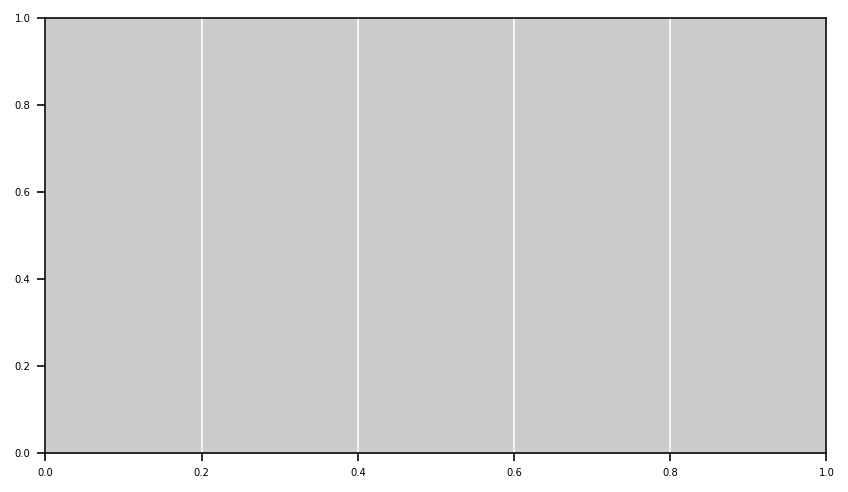

In [6]:
def axes_mod(ax):
    ax.set_facecolor('.8')
    ax.tick_params(labelsize=5, length=4)
    ax.grid(False, axis='x', color='white')
    ax.set_axisbelow(True)
    [spine.set_visible(True) for spine in ax.spines.values()]
fig , ax = plt.subplots(figsize=(7,4) , dpi=144)
colors = plt.cm.Dark2(range(6))
axes_mod(ax)

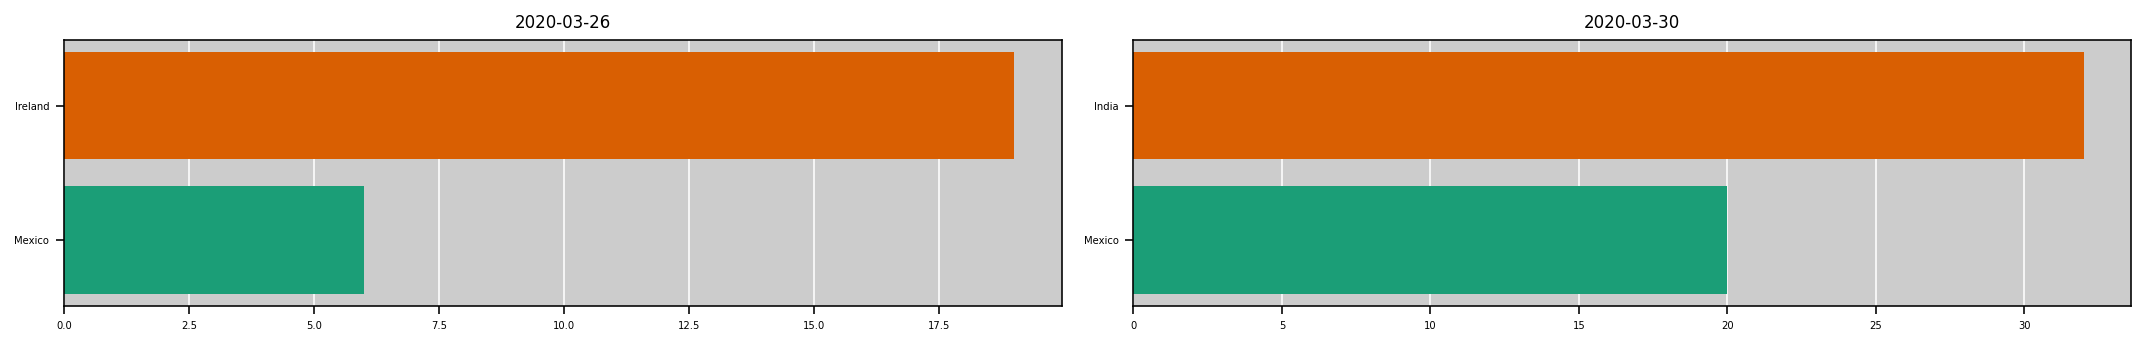

In [7]:
fig, ax_array = plt.subplots(nrows=1, ncols=2, figsize=(15, 2.5), dpi=144, tight_layout=True)
dates = ['2020-03-26', '2020-03-30']
for ax, date in zip(ax_array, dates):
    s = data.loc[date].sort_values()
    ax.barh(y=s.index[:2], width=s.values[:2], color=colors)
    ax.set_title(date, fontsize='smaller')
    axes_mod(ax)

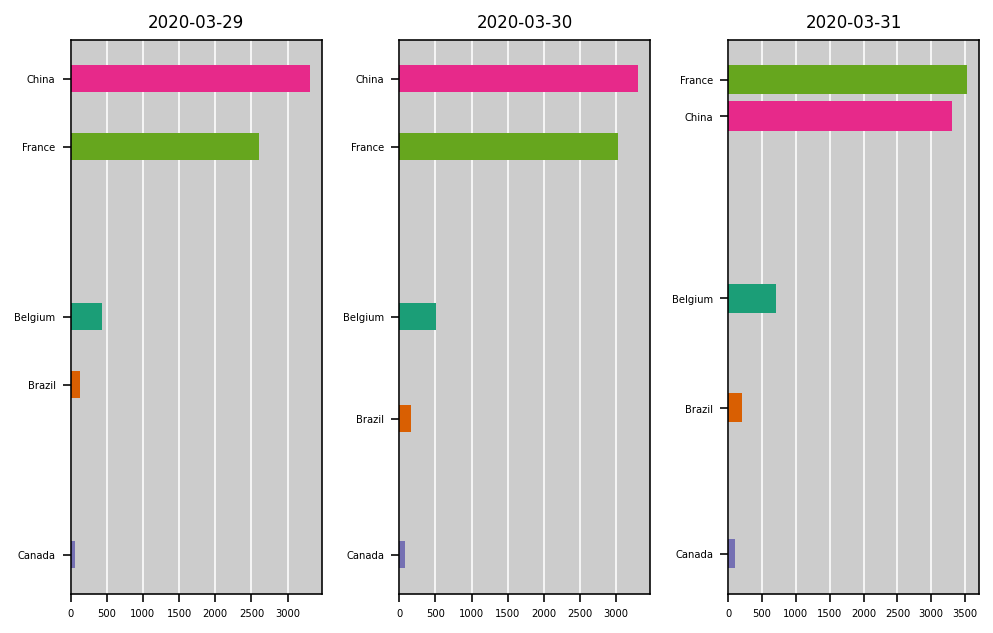

In [9]:
fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 4.5), dpi=144, tight_layout=True)
dates = ['2020-03-29', '2020-03-30', '2020-03-31']
for ax, date in zip(ax_array, dates):
    s = pd.Series(data.loc[date][:5])
    y = pd.Series(data.loc[date].rank(method='first').values[:5])
    ax.barh(y=y, width=s.values, color=colors, tick_label=s.index)
    ax.set_title(date, fontsize='smaller')
    axes_mod(ax)

In [10]:
def expend_data(df, steps=5):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('date')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate() # remplir les NULs
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

data = data.fillna(0)
df_expanded, df_rank_expanded = expend_data(data)
df_rank_expanded

,Belgium,Brazil,Canada,China,France,Germany,India,Indonesia,Iran,Ireland,Italy,Mexico,Netherlands,Portugal,Spain,Sweden,Switzerland,Turkey,USA,United Kingdom
date,,,,,,,,,,,,,,,,,,,,
2020-02-26,1.0,2.0,3.0,20.0,17.0,4.0,5.0,6.0,19.0,7.0,18.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
2020-02-26,1.0,2.0,3.0,20.0,17.0,4.0,5.0,6.0,19.0,7.0,18.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
2020-02-26,1.0,2.0,3.0,20.0,17.0,4.0,5.0,6.0,19.0,7.0,18.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
2020-02-26,1.0,2.0,3.0,20.0,17.0,4.0,5.0,6.0,19.0,7.0,18.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
2020-02-26,1.0,2.0,3.0,20.0,17.0,4.0,5.0,6.0,19.0,7.0,18.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-21,15.0,10.0,8.0,12.0,17.0,13.0,2.0,1.0,14.0,3.8,19.0,3.4,11.0,4.8,18.0,7.0,6.0,9.0,20.0,16.0
2020-04-21,15.0,10.0,8.0,12.0,17.0,13.0,2.0,1.0,14.0,3.6,19.0,3.8,11.0,4.6,18.0,7.0,6.0,9.0,20.0,16.0
2020-04-21,15.0,10.0,8.0,12.0,17.0,13.0,2.0,1.0,14.0,3.4,19.0,4.2,11.0,4.4,18.0,7.0,6.0,9.0,20.0,16.0


In [11]:
from matplotlib.animation import FuncAnimation

In [12]:
labels = data.columns
def init():
    ax.clear()
    axes_mod(ax)
    ax.set_ylim(0, 10)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]#.sort_values(ascending=False)
    width = df_expanded.iloc[i]#.sort_values(ascending=False)
    ax.barh(y=y, width=width, color=colors, tick_label=width.index)
    date_str = df_expanded.index[i].strftime('%B %-d, %Y')
    ax.set_title(f'Deaths- {date_str}', fontsize='smaller')
    
fig = plt.Figure(figsize=(4, 3.5), dpi=244)
ax = fig.add_subplot()
anim = FuncAnimation(fig=fig, func=update, init_func=init, frames=len(df_expanded), 
                     interval=100, repeat=True)

In [13]:
from IPython.display import HTML
html = anim.to_html5_video()
HTML(html)